In [1]:
import torch
from src import const
from src.utils import get_train_test
from src.dataset import DeepFashionInShopDataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = 'models/FashionEmbedding.pkl'

### Load网络和数据集

In [3]:
net = const.USE_NET(const.NUM_CLASSES)
net.load_state_dict(torch.load(model))
net.eval()  # 调整到eval模式
net = net.to(const.device)

In [4]:
_, test_df = get_train_test()
test_dataset = DeepFashionInShopDataset(test_df, 'CENTER')
# 这里的shuffle=False很重要，它保证了执行出来的embedding和test_df中数据的形式是一致的
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)

### 在test数据集上执行一遍，记录embedding

In [5]:
ret = []
with torch.no_grad():
    for i, sample in enumerate(test_dataloader):
        for key in sample:
            sample[key] = sample[key].to(const.device) #transfer to cuda(gpu)
        feature = net(sample['image'])['embedding']
        ret.append(feature.cpu().numpy())

In [6]:
# emb是所有embedding
emb = np.concatenate(ret, axis=0)

### 测试

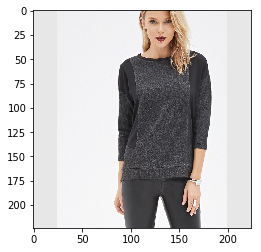

In [20]:
# 测试：找到和第i件图片embedding最近的5件衣服，显示出来
i = 101
test_dataset.plot_sample(i)

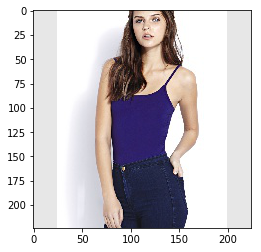

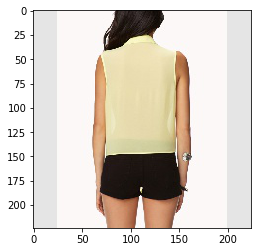

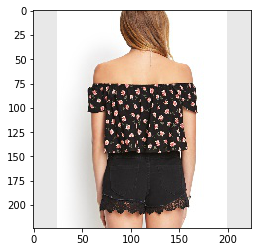

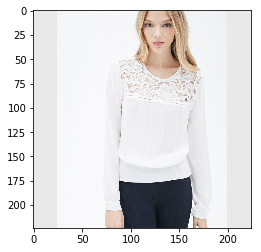

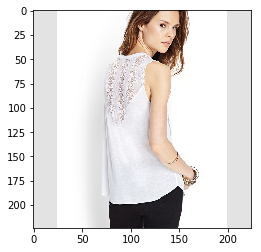

In [21]:
one_emb = emb[i, :]
dist = np.sqrt(np.sum((emb - one_emb) * (emb - one_emb), axis=1))
nearest = np.argsort(dist)
nearest = nearest[nearest != i] # 最近的肯定是自己本身，去掉它

for k in nearest[:5]:
    test_dataset.plot_sample(k)